# This is a workbook to explore LangGraph
#### Used as resource: https://www.datacamp.com/tutorial/langgraph-tutorial
#### Must update pip to get the installs to be compatible with each other
#### It works on Datalab. Reconfiguring will be needed for use on other platform.
#### Created Sept 15, 2025

In [1]:
!python3 -m pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 103.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
!pip --version

pip 25.2 from /home/repl/.local/lib/python3.10/site-packages/pip (python 3.10)


In [3]:
# pip installs needed
!pip install langgraph langchain-core langchain-community langchain_openai duckduckgo-search

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-openai to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 65.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 121.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.6/947.6 kB 64.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 11.7 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 7.6 MB/s  0:00:00 eta 0:00:01mm
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20/20 [langchain-community]ngchain-community]
ERROR: pip's dependency resolver does not curren

In [4]:
# Import libraries
from typing import TypedDict
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END

In [5]:
# Typed Dict Example

class PersonDictionary(TypedDict):
    name:str
    age:int
    is_student:bool

# Create a typed dictionary
our_person: PersonDictionary = {
    "name": "James",
    "age":    25,
    "is_student": True
}
our_person #Just to check

{'name': 'James', 'age': 25, 'is_student': True}

In [6]:
# Include OpenAI API key here (including in the environment)
import os
print(os.getcwd())
print(os.listdir())
# print(os.environ["OPENAI_API_KEY"]) #To use with Datalab, create an environment variable
openai_api_key = os.environ["OPENAI_API_KEY"]

/work/files/workspace
['notebook.ipynb']


In [7]:
api_key = os.environ.get('OPENAI_API_KEY')

if api_key:
    print(f"API Key: present")
else:
    print("API key not found in environment variables.")

API Key: present


In [8]:
# Define the state of the Agent
class AgentState(TypedDict):
    user_message: HumanMessage

llm = ChatOpenAI(model="gpt-5-nano", temperature=0.7)
# See model pricing (and names) here: https://platform.openai.com/docs/pricing?latest-pricing=standard

#Create the first node - purpose is to pass the user's message to the LLM
def first_node(state: AgentState) -> AgentState:
    response = llm.invoke(state["user_message"])
    print(f"\nAI: {response.content}")
    return state

In [9]:
#Build a graph
graph= StateGraph(AgentState)
graph.add_node("node1", first_node) # Name of the node on the graph, name of the underlying function
graph.add_edge(START, "node1")
graph.add_edge("node1", END)
agent = graph.compile()

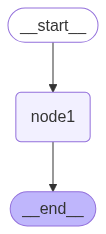

In [10]:
from IPython.display import Image, display
display(Image(agent.get_graph().draw_mermaid_png()))

In [ ]:
while True:
    user_input = input("Enter: ")
    if user_input != "exit":
        agent.invoke({"user_message": [HumanMessage(content=user_input)]})
    else:
        break

Enter: Should I brush my teeth?

AI: Yes. Brushing your teeth regularly is important for cavity prevention, gum health, and fresh breath.

What to do:
- Frequency and duration: Brush twice a day for about 2 minutes each time.
- Toothpaste: Use fluoride toothpaste. For kids, use a smaller amount (pea-sized); adults use a normal pea-sized dab.
- Technique: Use a soft-bristled brush. Gentle circular or short back-and-forth strokes on all surfaces (outer, inner, chewing). Don’t scrub hard. Brush your tongue or use a tongue scraper too.
- Surfaces to clean: All teeth surfaces, plus the gumline. Don’t forget the back teeth.
- After brushing: Spit out excess toothpaste and, if possible, don’t rinse heavily with water right away so fluoride stays on your teeth a bit longer.
- Brush replacement: Replace your toothbrush every 3–4 months or sooner if the bristles fray. If you have braces or dental work, you may need to replace more often.

Extras that help:
- Floss daily to clean between teeth.
-